In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [49]:
data = pd.read_csv('D:\downloads\example.csv')

In [50]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.55
6,10,-0.97
7,8,1.02
8,8,0.68
9,10,-0.34


Text(0, 0.5, 'Loyalty')

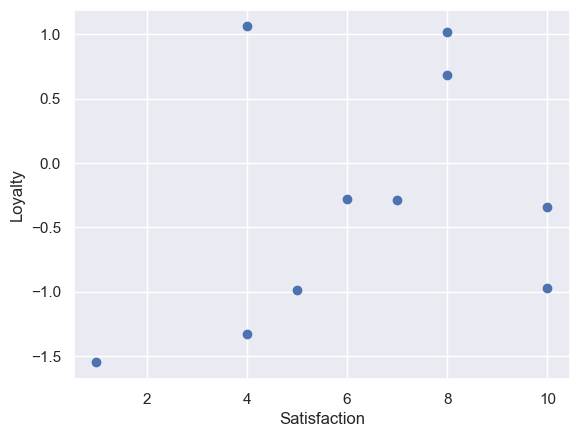

In [51]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [52]:
x = data.copy()


In [53]:
kmeans=KMeans(2)
kmeans.fit(x)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [54]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Loyalty')

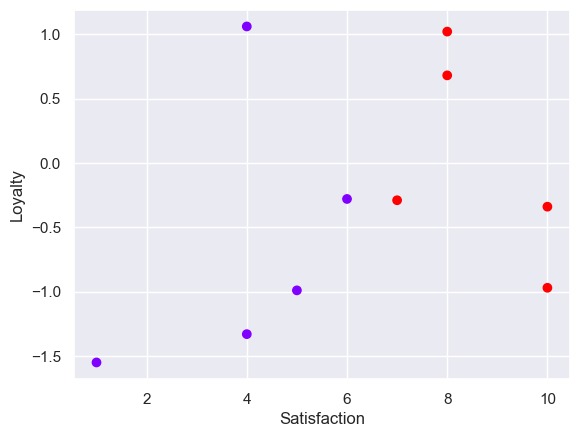

In [55]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [56]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.84492611, -1.14535125],
       [-0.11020775,  0.02110735],
       [-0.47756693, -0.76764085],
       [ 0.25715143,  0.00999822],
       [-0.84492611,  1.5097307 ],
       [-1.94700365, -1.3897521 ],
       [ 1.35922896, -0.74542259],
       [ 0.6245106 ,  1.46529418],
       [ 0.6245106 ,  1.08758378],
       [ 1.35922896, -0.04554743]])

In [57]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\a

[20.0,
 9.715367695765982,
 5.047750017018941,
 3.108073467355935,
 1.6322939402625525,
 0.5225922383744761,
 0.2776796207775446,
 0.1388706635781899,
 0.06753808964469216]

Text(0, 0.5, 'WCSS')

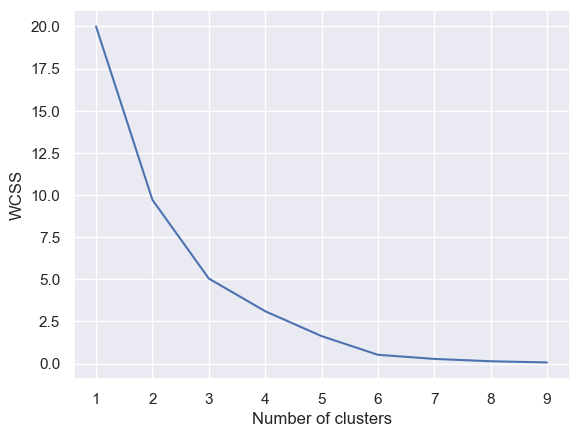

In [58]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [59]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit(x_scaled)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,KMeans(n_clusters=5)
1,6,-0.28,KMeans(n_clusters=5)
2,5,-0.99,KMeans(n_clusters=5)
3,7,-0.29,KMeans(n_clusters=5)
4,4,1.06,KMeans(n_clusters=5)
5,1,-1.55,KMeans(n_clusters=5)
6,10,-0.97,KMeans(n_clusters=5)
7,8,1.02,KMeans(n_clusters=5)
8,8,0.68,KMeans(n_clusters=5)
9,10,-0.34,KMeans(n_clusters=5)


TypeError: float() argument must be a string or a real number, not 'KMeans'

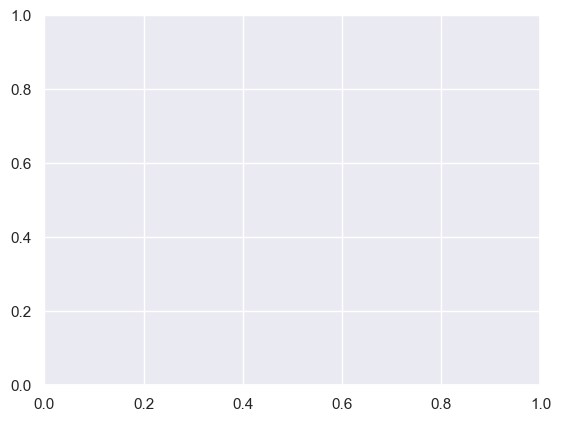

In [61]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [62]:
print('Name')

Name


In [64]:
name='shivam'
print(name)

shivam


In [65]:
str('Rishika')

'Rishika'

In [67]:
name='ghf'
print(name)

ghf


In [68]:
type(name)

str

In [71]:
student = ['r',21,10]
print(student)

['r', 21, 10]


In [73]:
stu={'name':'shree','age':14,'ph':22204}

In [74]:
stu.keys()

dict_keys(['name', 'age', 'ph'])